In [1]:
# 1. Run time for original code:
import time 
start = time.time()

In [2]:
# 2. Reading Libraries
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
# 3. Reading Data
train_raw = pd.read_parquet('./data/train_data.parquet')
labels = pd.read_csv('./data/train_labels.csv')

In [4]:
labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [5]:
train_raw = train_raw.merge(labels, left_on='customer_ID', right_on='customer_ID')

In [6]:
train_raw = train_raw.drop(columns = ['target_x'])
train_raw.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target_y
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.00

In [7]:
train_raw = train_raw.rename(columns = {'target_y': 'target'})

In [8]:
train_raw['target'].value_counts()

0    4153582
1    1377869
Name: target, dtype: int64

In [9]:
train_raw.shape

(5531451, 191)

In [10]:
# 4. EDA
train_raw['S_2'] = pd.to_datetime(train_raw['S_2'])
categorical_features = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
train_raw[categorical_features] = train_raw[categorical_features].astype("category")
train_raw[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

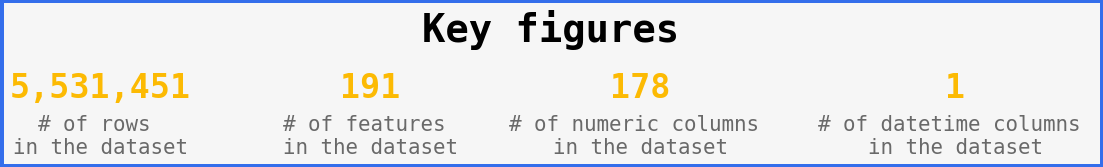

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)

data = train_raw
df_dtypes = train_raw.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.2, 0.4, "{}".format(len(data.select_dtypes(np.number).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(data.select_dtypes('datetime').columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9, 0.001,"# of datetime columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')
    
plt.show()

In [12]:
print(f'Train dates range is from {train_raw["S_2"].min()} to {train_raw["S_2"].max()}.')

Train dates range is from 2017-03-01 00:00:00 to 2018-03-31 00:00:00.


In [13]:
tmp = train_raw.isna().sum().div(len(train_raw)).mul(100).sort_values(ascending=False)

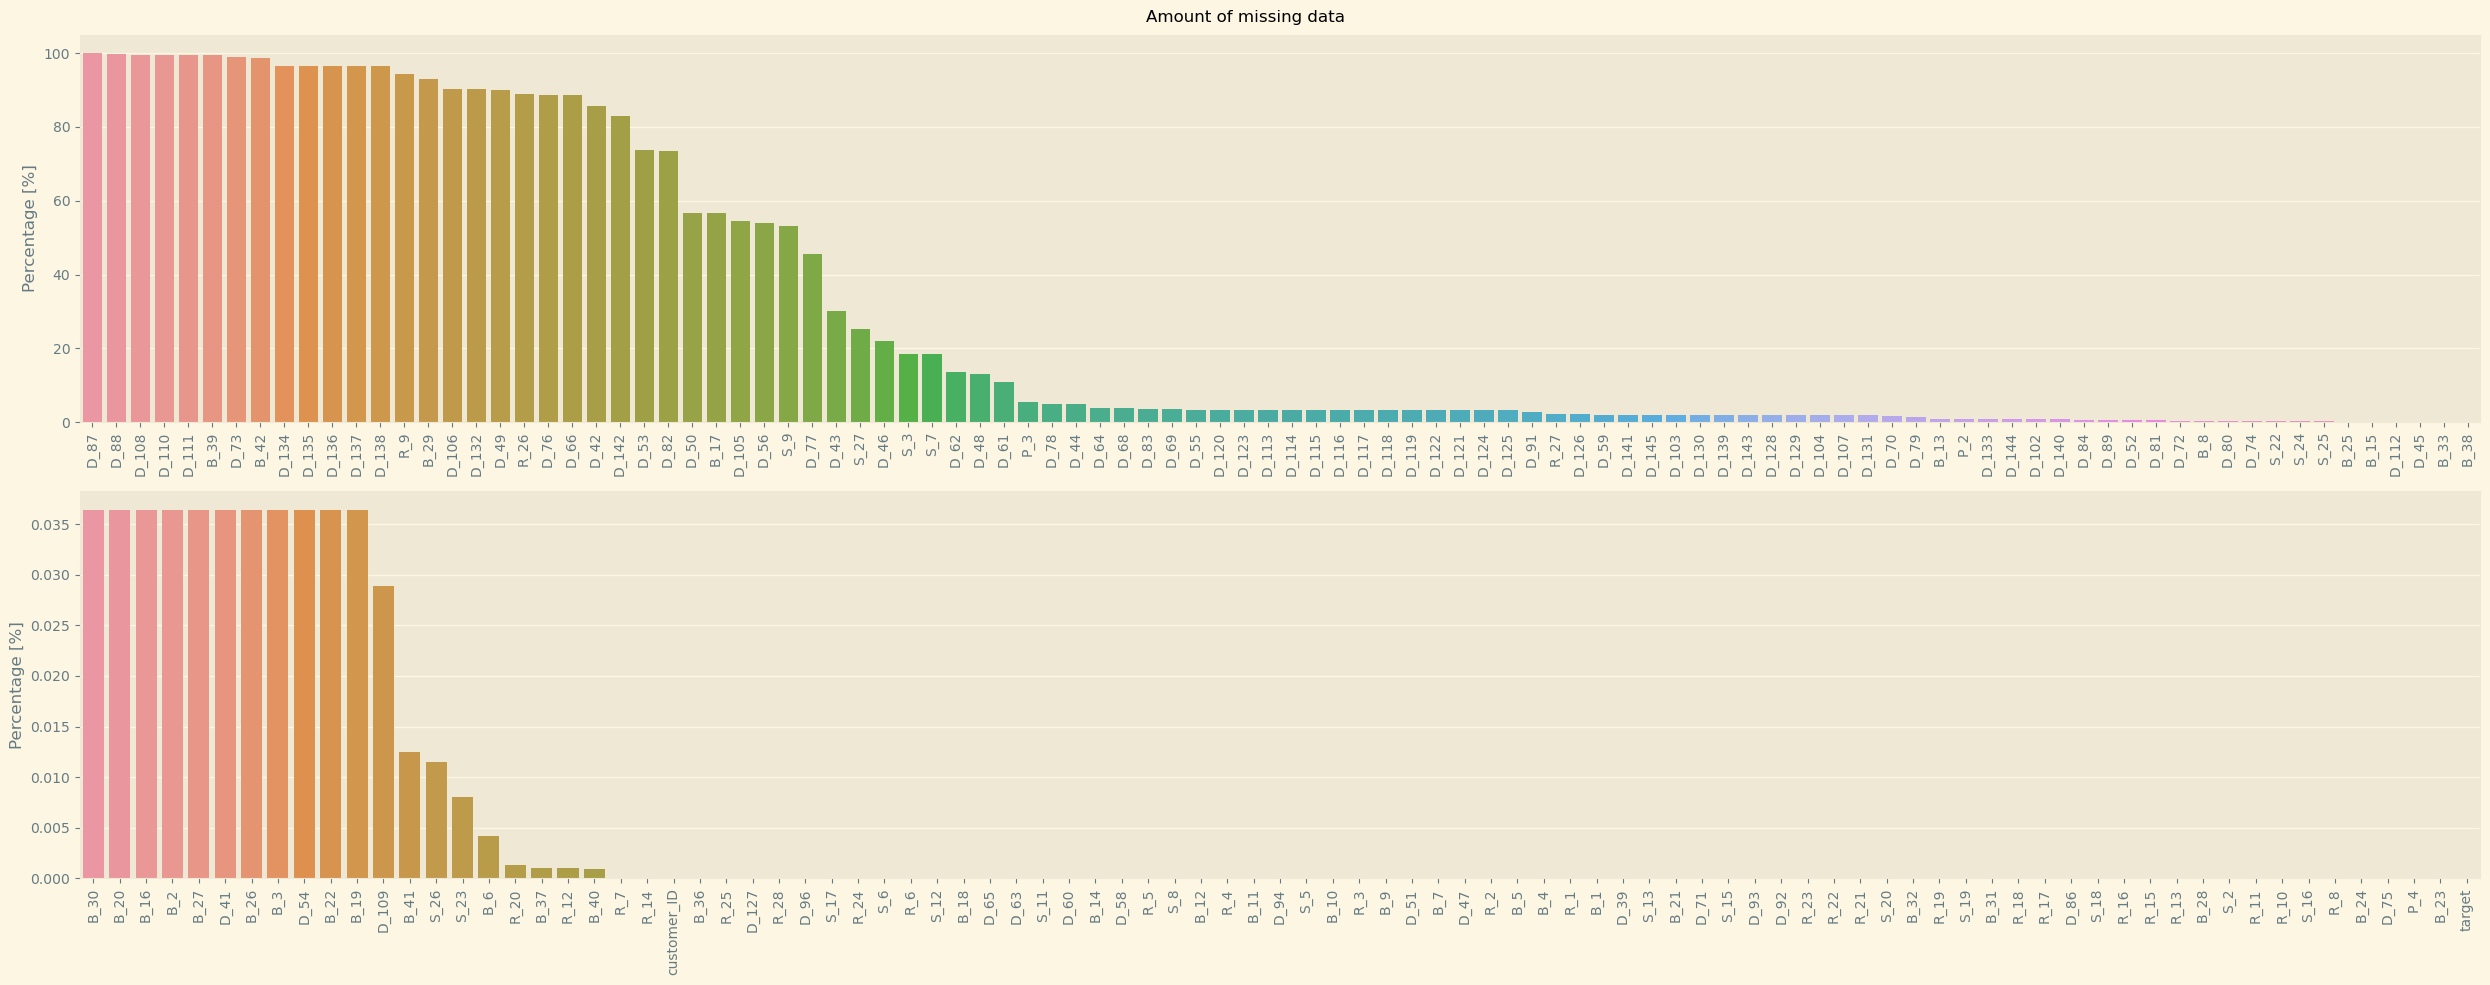

In [14]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=tmp[:100].index, y=tmp[:100].values, ax=ax[0])
sns.barplot(x=tmp[100:].index, y=tmp[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Amount of missing data")
plt.tight_layout()
plt.show()

In [15]:
tmp.head(10)
#print(list(tmp.index[:10]))

D_87     99.930127
D_88     99.891457
D_108    99.476846
D_110    99.433530
D_111    99.433530
B_39     99.391986
D_73     98.990211
B_42     98.707789
D_134    96.480146
D_135    96.480146
dtype: float64

In [16]:
tmp = train_raw['target'].value_counts().div(len(train_raw)).mul(100)

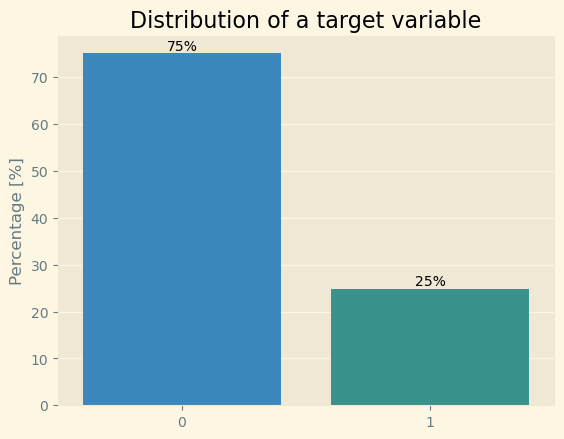

In [17]:
ax = sns.barplot(x=tmp.index, y=tmp.values)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Distribution of a target variable")
plt.ylabel("Percentage [%]")
plt.show()

In [18]:
print(f'Number of unique customers: {train_raw["customer_ID"].nunique()}')

Number of unique customers: 458913


In [19]:
cust_presence = train_raw.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'presence'})
cust_presence.head()

,customer_ID,target,presence
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


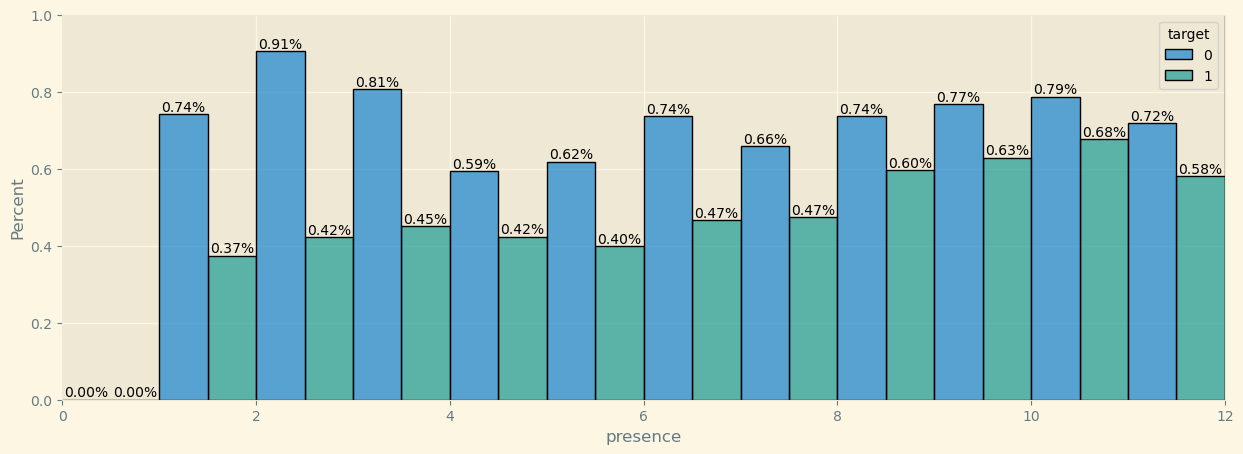

In [20]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='presence', data=cust_presence, hue='target', stat='percent', multiple="dodge", bins=np.arange(0,14), ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')
ax.set_xlim(0,12)
ax.set_ylim(0,1)
plt.show()

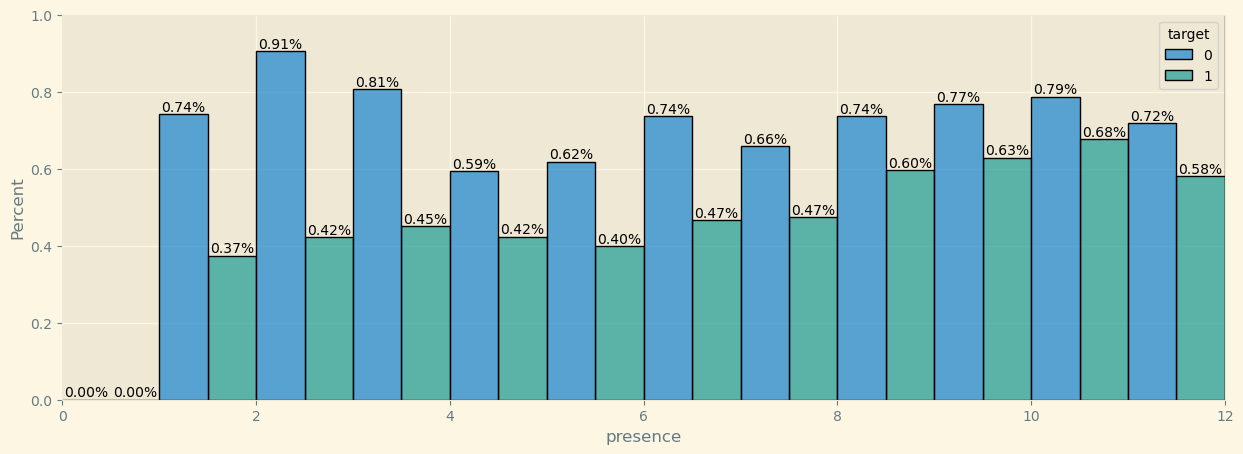

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='presence', data=cust_presence, hue='target', stat='percent', multiple="dodge", bins=np.arange(0,14), ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')
ax.set_xlim(0,12)
ax.set_ylim(0,1)
plt.show()

In [22]:
short_customer_ids = list(cust_presence[cust_presence['presence']<13]['customer_ID'])
gc.collect()

51990

In [23]:
short_customers = train_raw[train_raw['customer_ID'].isin(short_customer_ids)][['customer_ID','S_2']]
short_customers['month'] = short_customers['S_2'].dt.month
short_customers['year'] = short_customers['S_2'].dt.year
short_customers.groupby(['year','month']).size()

year  month
2017  3         9596
      4        15522
      5        14272
      6        24350
      7        29568
      8        35065
      9        39421
      10       44258
      11       48234
      12       52876
2018  1        60221
      2        66747
      3        72879
dtype: int64

In [24]:
len(short_customers)

513009

In [25]:
n=2
short_customer_ids_n = list(cust_presence[cust_presence['presence']<=n]['customer_ID'])

short_customers = train_raw[train_raw['customer_ID'].isin(short_customer_ids_n)][['customer_ID','S_2']]
short_customers['month'] = short_customers['S_2'].dt.month
short_customers['year'] = short_customers['S_2'].dt.year
print(f"Customers with presence equal to {n} observations.")
print(short_customers.groupby(['year','month']).size())

Customers with presence equal to 2 observations.
year  month
2017  3           27
      4           11
      5            4
      6            6
      7            2
      8            6
      9            1
      10           3
      11           2
      12           9
2018  1          271
      2         5756
      3        11218
dtype: int64


In [26]:
len(short_customers)

17316

In [27]:
cust_2obs_03_2017 = list(short_customers.loc[(short_customers['year']==2017)&(short_customers['month']==3),'customer_ID'])

In [28]:
sample_customer = np.random.choice(cust_2obs_03_2017)
train_raw[train_raw["customer_ID"]==sample_customer].head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2045119,5e614628e43057a3c1ded5c032a5da8cf604467eeca83b...,2017-03-27,NaN,0.008981,0.007530,0.813019,0.002189,0.21501,0.009257,0.002774,NaN,0.211299,0.005897,0.041405,0.112070,0.001913,0.003875,0.560616,0.132005,0.173321,NaN,0.118249,0.028815,1.003439,0.114055,0.000010,0.329254,0.300286,0.186449,0.65774,0.297423,NaN,0.001246,0.003144,1.006605,1.004284,0.007871,0.16776,0.012855,0.325038,0.140930,0.244467,0.007756,0.008386,0.001624,NaN,0.000983,NaN,0.012713,0.163202,0.009612,0.121171,0.163356,CO,O,0.004312,0.086360,NaN,1.000148,0.006328,NaN,0.001119,2.0,0.193093,0.005748,0.005738,0.006452,0.002734,0.008453,0.001176,0.013517,0.007967,0.309716,0.010642,NaN,0.005812,0.008377,0.007122,NaN,0.004586,0.006419,0.151501,0.007008,0.008357,0.000337,NaN,0.007797,NaN,0.003583,0.608515,0.002549,0.002209,0.007531,0.005243,NaN,0.000963,1.002270,0.032598,0.002664,0.009082,0.003904,0.009118,0.001122,0.005976,NaN,0.0,0.009108,0.000403,NaN,0.000021,0.004655,NaN,1,0.001462,0.008244,0.002723,0.007047,0.003535,0.002162,1.003677,0.007742,0.003862,0.007476,0.005591,0.009237,0.008610,0.009435,0.000343,0.008344,0.006895,0.919576,0.133642,0.885700,0.973993,0.005366,NaN,NaN,NaN,NaN,NaN,NaN,0.000088,0.011785,0.005668,0.030444,2.0,NaN,0.008208,NaN,NaN,NaN,1.004854,0.010724,NaN,1.202137,1.0,0.196884,0.0,5.0,0.194491,0.191157,0.0,0.151907,0.292513,0.000177,0.599918,0.008794,0.0,0.008257,NaN,NaN,0.008664,NaN,NaN,NaN,NaN,NaN,0.009464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2045120,5e614628e43057a3c1ded5c032a5da8cf604467eeca83b...,2018-03-09,0.874796,0.004076,0.003435,0.813616,0.006861,NaN,0.007094,0.004143,NaN,0.061666,0.009380,0.016603,0.127037,0.001913,0.004674,NaN,0.161804,0.076178,NaN,0.143108,0.028721,NaN,0.195680,0.336109,0.009783,0.001996,0.184226,NaN,0.293797,NaN,0.005690,0.009106,1.007376,1.001822,0.005633,NaN,0.010177,0.001163,0.033169,0.302827,0.000438,0.008396,0.003424,NaN,0.005088,0.544365,0.000592,0.167261,0.000288,0.285454,0.159956,CO,O,0.005198,0.000916,NaN,1.009249,0.000205,NaN,0.008523,3.0,0.190839,0.000706,0.006905,0.001461,0.005040,0.002180,0.000061,0.011853,0.007266,0.501651,0.017480,NaN,0.004217,0.007881,0.008696,NaN,0.004729,0.000179,0.157658,0.008890,0.000409,0.000940,0.002188,0.001620,NaN,0.002929,0.609347,0.002929,0.001538,0.000793,0.003579,NaN,0.003444,1.008225,0.029981,0.000117,0.000017,0.006429,0.005299,0.008970,0.006400,NaN,0.0,0.009677,0.001636,NaN,0.006805,0.003524,NaN,1,0.000164,0.003036,0.007047,0.003281,0.007414,0.005528,1.005444,0.002544,0.002110,0.008957,0.009464,0.002217,0.006524,0.005619,0.008718,0.006429,0.002368,0.301272,0.132782,0.084483,0.969952,0.008432,0.571903,1.009717,0.974856,0.460008,NaN,0.34117,0.008442,0.003370,NaN,NaN,1.0,NaN,0.000361,NaN,NaN,NaN,1.004326,0.012739,NaN,1.002395,1.0,0.047178,0.0,5.0,0.051999,0.048903,0.0,0.170418,0.288926,0.007627,0.454978,0.009243,0.0,0.001027,1.002242,1.001726,0.003222,NaN,0.00019,0.007117,NaN,0.004479,0.009730,NaN,NaN,NaN,NaN,NaN,0.004206,0.007331,0.000919,NaN,0.006725,0.007878,0.000058,0


In [29]:
def sample_full_cust(df, cust_ratio):
    n_customers = df['customer_ID'].nunique()
    no_of_cust = int(n_customers*cust_ratio)
    cust_ids = np.random.choice(df['customer_ID'].unique(), no_of_cust)
    print(f'Number of customers sampled: {no_of_cust}')
    ready_df = df[df['customer_ID'].isin(cust_ids)]
    print(f'Number of rows sampled: {len(ready_df)} ({round(len(ready_df)/len(df)*100)}%)')
    return ready_df

In [30]:
train_samples = sample_full_cust(train_raw, 0.55)

Number of customers sampled: 252402
Number of rows sampled: 2338877 (42%)


In [31]:
correlations = train_samples.corr().abs()

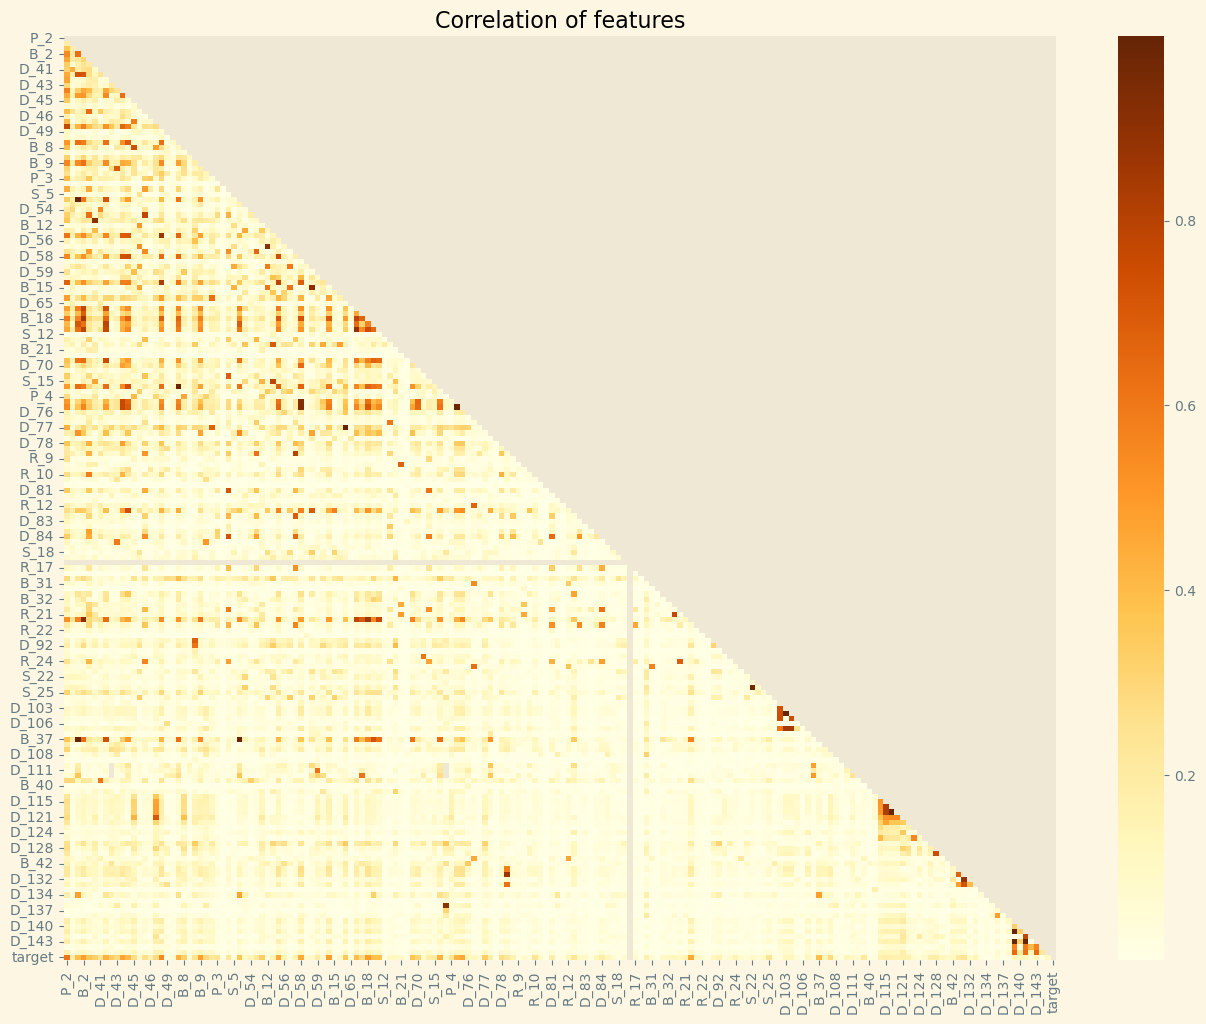

In [32]:
mask=np.triu(np.ones_like(correlations))

fig, ax = plt.subplots(1,1, figsize=(16,12))
sns.heatmap(correlations, ax=ax, mask=mask, cmap='YlOrBr')
ax.set_title("Correlation of features")
plt.show()

In [33]:
unstacked = correlations.unstack()
unstacked = unstacked.sort_values(ascending=False, kind="quicksort").drop_duplicates().head(25)
unstacked

P_2    P_2      1.000000
D_62   D_77     0.999778
D_104  D_103    0.999748
D_139  D_143    0.999538
D_141  D_139    0.998155
D_143  D_141    0.997716
B_1    B_11     0.995659
B_23   B_7      0.995040
D_118  D_119    0.994931
B_37   B_1      0.992715
       B_11     0.987857
D_75   D_74     0.987633
S_22   S_24     0.970658
D_75   D_58     0.925652
D_58   D_74     0.922387
B_12   B_13     0.916870
B_33   B_2      0.913055
S_7    S_3      0.903891
B_15   B_14     0.903595
D_73   D_136    0.899144
B_20   B_16     0.888512
D_132  D_131    0.879972
D_131  D_79     0.868984
D_55   D_48     0.862613
B_18   B_33     0.853112
dtype: float64

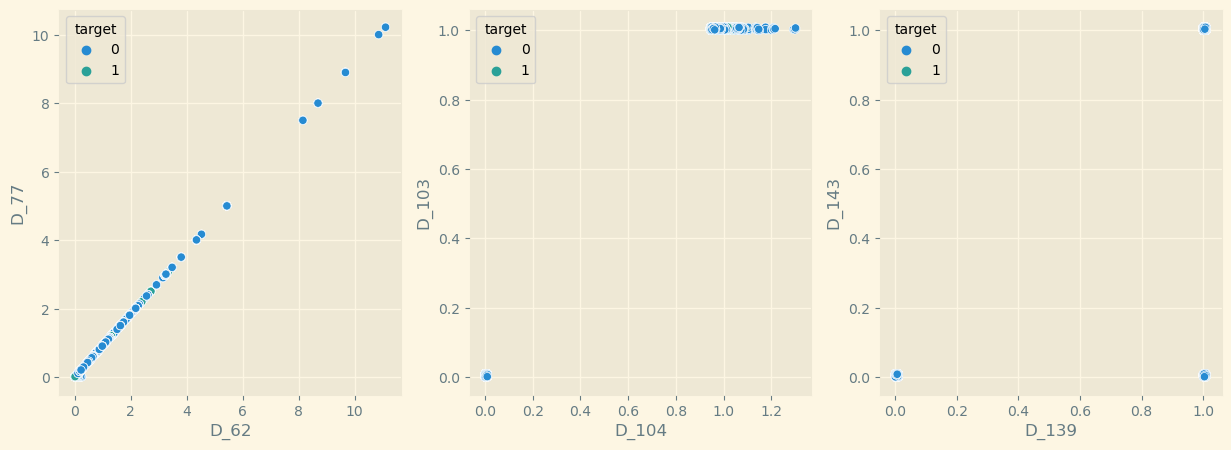

In [34]:
x1, y1 = unstacked.index[1]
x2, y2 = unstacked.index[2]
x3, y3 = unstacked.index[3]

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(x=x1, y=y1, data=train_samples, hue='target', ax=ax[0])
sns.scatterplot(x=x2, y=y2, data=train_samples, hue='target', ax=ax[1])
sns.scatterplot(x=x3, y=y3, data=train_samples, hue='target', ax=ax[2])
plt.show()

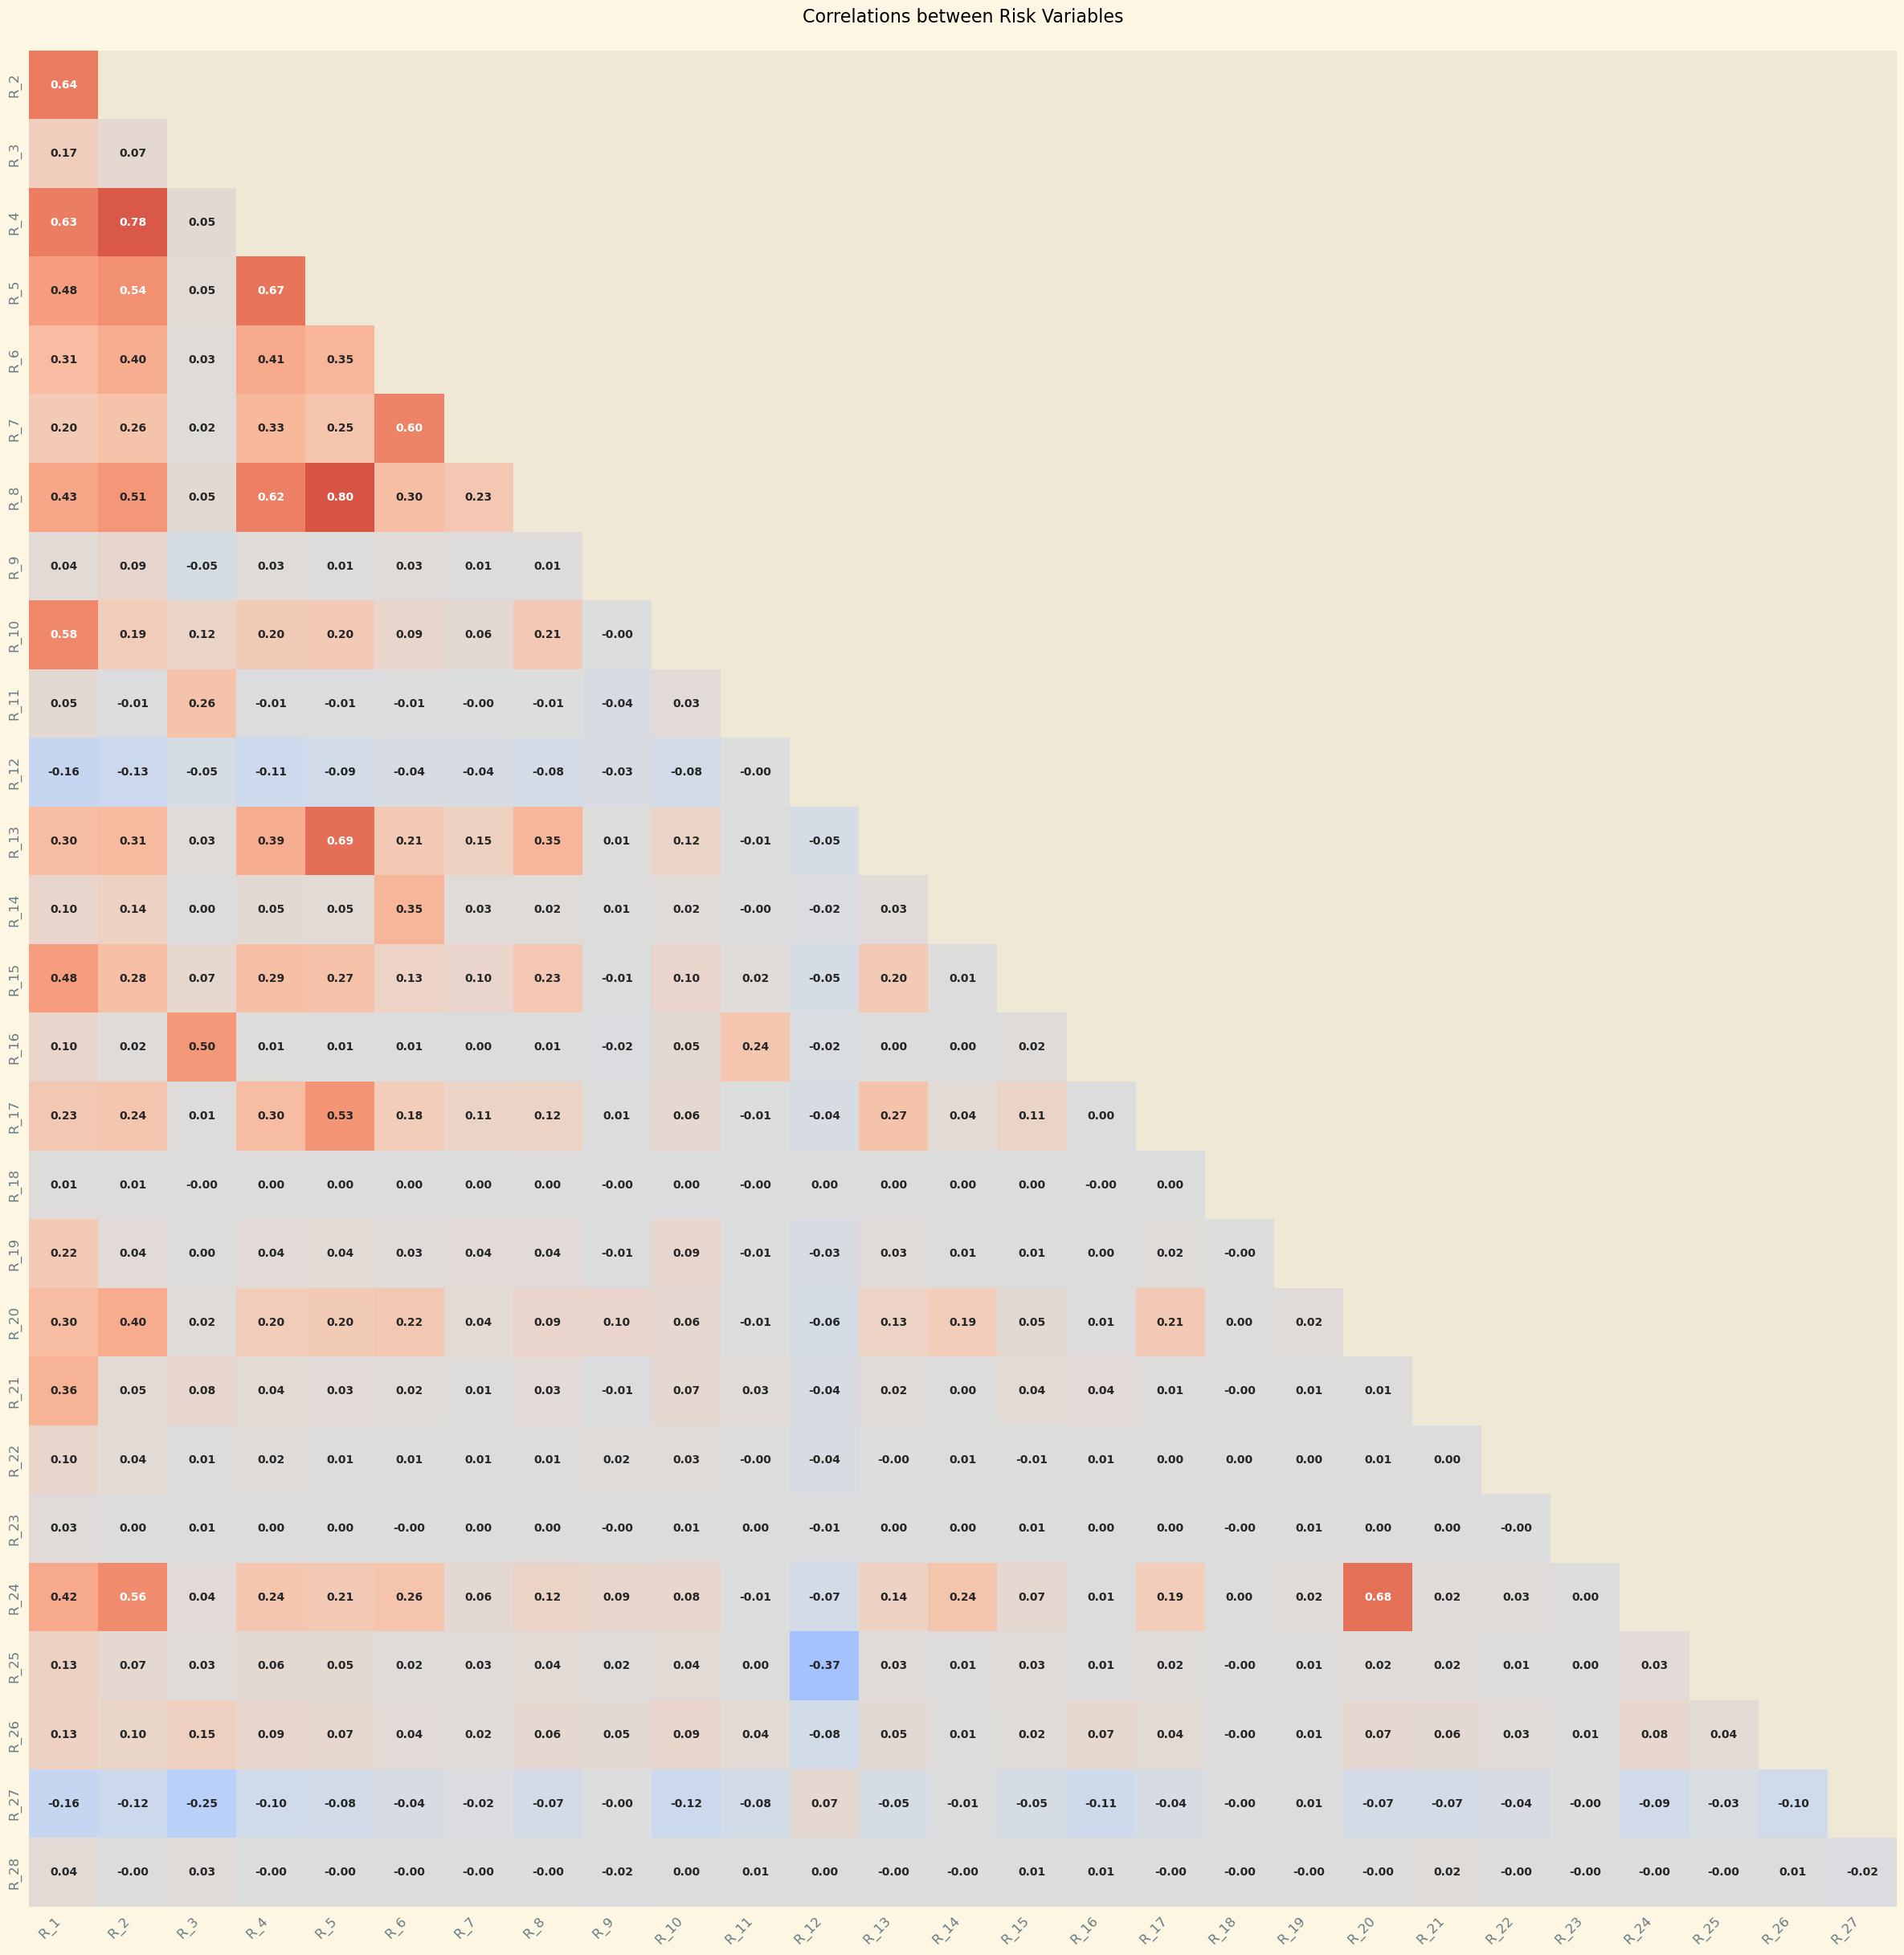

In [35]:
# code adapted from: https://www.kaggle.com/code/kellibelcher/amex-default-prediction-eda-lgbm-baseline
cols_to_show = [c for c in train_samples.columns if (c.startswith('R'))]
corr=train_samples[cols_to_show].corr()
mask=np.triu(np.ones_like(corr))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(30,30))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Risk Variables\n', fontsize=16)
plt.show()

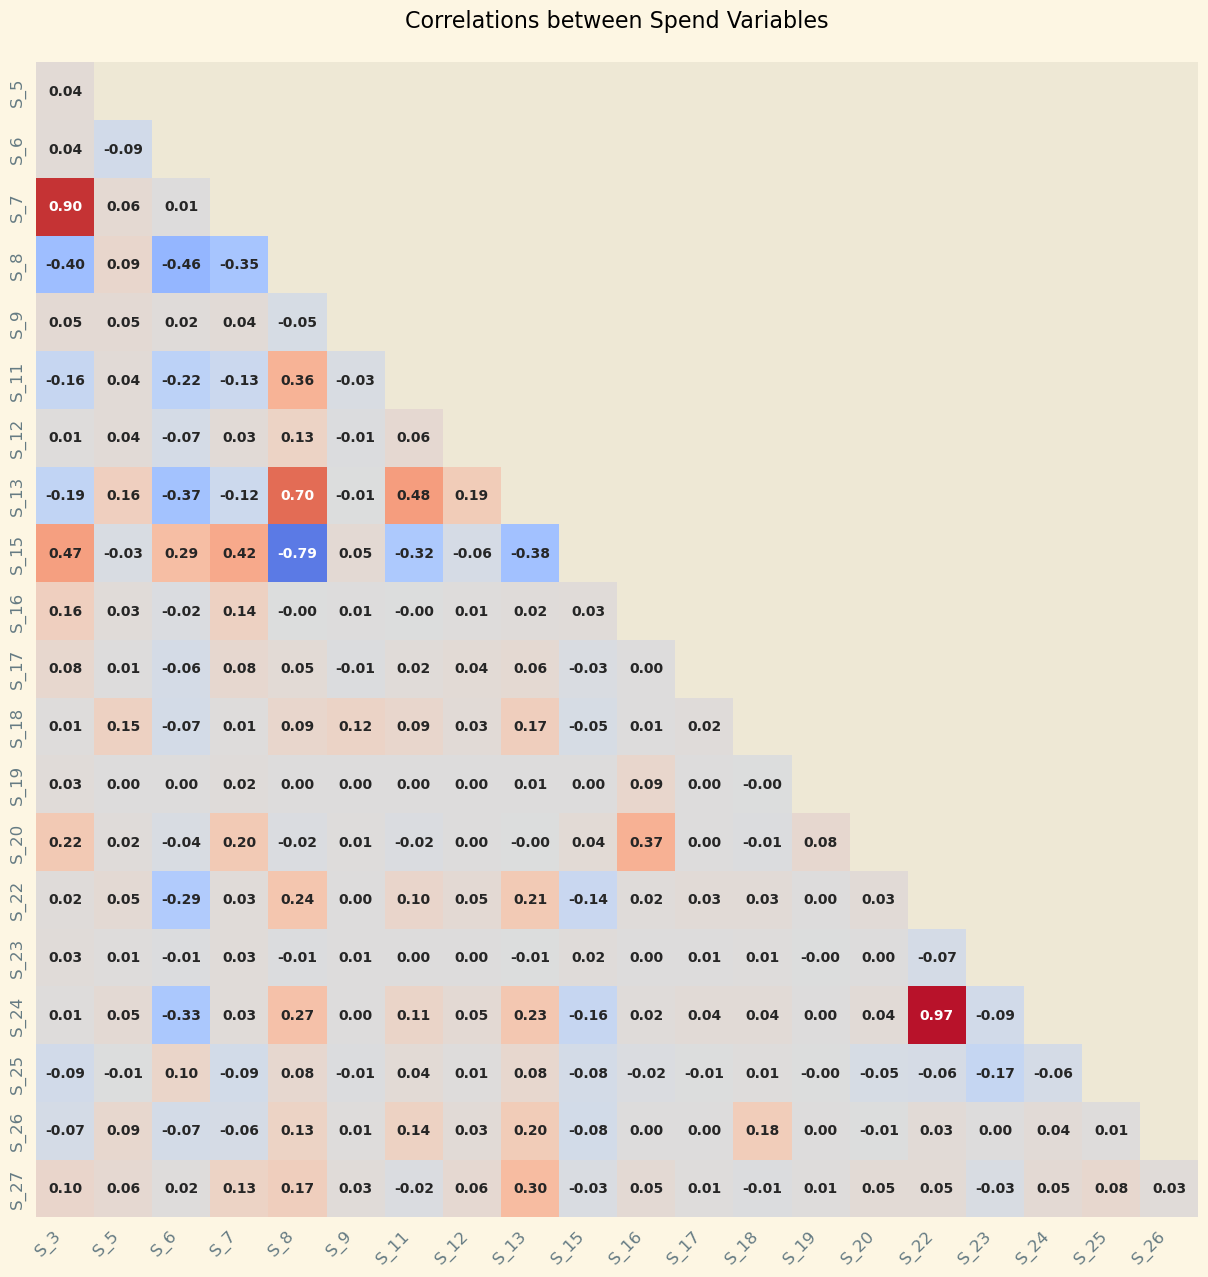

In [36]:
# code adapted from: https://www.kaggle.com/code/kellibelcher/amex-default-prediction-eda-lgbm-baseline
cols_to_show = [c for c in train_samples.columns if (c.startswith('S'))]
corr=train_samples[cols_to_show].corr()
mask=np.triu(np.ones_like(corr))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Spend Variables\n', fontsize=16)
plt.show()

In [37]:
train_raw[categorical_features].sample(10)

,B_30,B_38,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
5434284,0.0,1.0,CR,R,NaN,4.0,0.0,0.0,2.0,0.0,0.0
3359836,0.0,2.0,CR,O,NaN,6.0,0.0,0.0,-1.0,0.0,1.0
163403,0.0,1.0,CO,O,1.0,6.0,1.0,0.0,-1.0,0.0,1.0
3617888,0.0,2.0,CO,O,NaN,4.0,1.0,0.0,4.0,0.0,0.0
96719,0.0,2.0,CO,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
3481942,0.0,2.0,CO,R,1.0,5.0,1.0,0.0,3.0,0.0,1.0
5446062,0.0,3.0,CO,U,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
2442234,0.0,2.0,CR,U,NaN,5.0,0.0,0.0,5.0,0.0,0.0
1498336,0.0,3.0,CO,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
3475005,0.0,5.0,CO,U,NaN,6.0,1.0,0.0,-1.0,0.0,1.0


In [38]:
for cf in categorical_features:
    print(cf, list(train_raw[cf].unique()))

B_30 [0.0, 2.0, 1.0, nan]
B_38 [2.0, 1.0, 3.0, 5.0, 6.0, 7.0, 4.0, nan]
D_63 ['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']
D_64 ['O', 'R', nan, 'U', '-1']
D_66 [nan, 1.0, 0.0]
D_68 [6.0, 2.0, 3.0, nan, 5.0, 4.0, 0.0, 1.0]
D_114 [1.0, 0.0, nan]
D_116 [0.0, nan, 1.0]
D_117 [4.0, -1.0, 6.0, 2.0, 1.0, nan, 3.0, 5.0]
D_120 [0.0, 1.0, nan]
D_126 [1.0, nan, 0.0, -1.0]


In [39]:
train_raw[categorical_features].isna().sum().div(len(train_raw)).sort_values(ascending=False)

D_66     0.887307
D_64     0.039310
D_68     0.039140
D_114    0.031947
D_116    0.031947
D_117    0.031947
D_120    0.031947
D_126    0.021119
B_30     0.000364
B_38     0.000364
D_63     0.000000
dtype: float64

In [40]:
def show_kdeplots(letter, figsize):   
    cols = [c for c in train_samples.columns if (c.startswith((letter,'t'))) & (c not in categorical_features)]
    df_tmp = train_samples[cols]
    plt_cols = 5
    plt_rows = math.ceil(len(cols)/plt_cols)
    
    fig, axes = plt.subplots(plt_rows, plt_cols, figsize=figsize)
    for i, ax in enumerate(axes.reshape(-1)):
        if i<len(cols)-1:
            sns.kdeplot(x=cols[i], hue='target', hue_order=[1,0], label=['Default','Paid'], data=df_tmp, 
                        fill=True, linewidth=2, legend=False, ax=ax)
        ax.tick_params(left=False, bottom=False, labelsize=5)
        ax.xaxis.get_label().set_fontsize(10)
        ax.set_ylabel('')

    sns.despine(bottom=True, trim=True)
    plt.tight_layout(rect=[0, 0.2, 1, 0.99])
    plt.show()

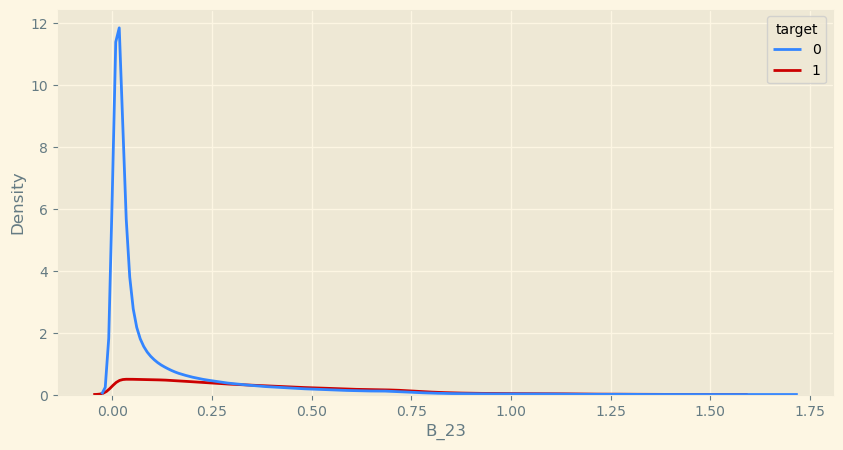

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(data=train_raw, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax)
plt.show()

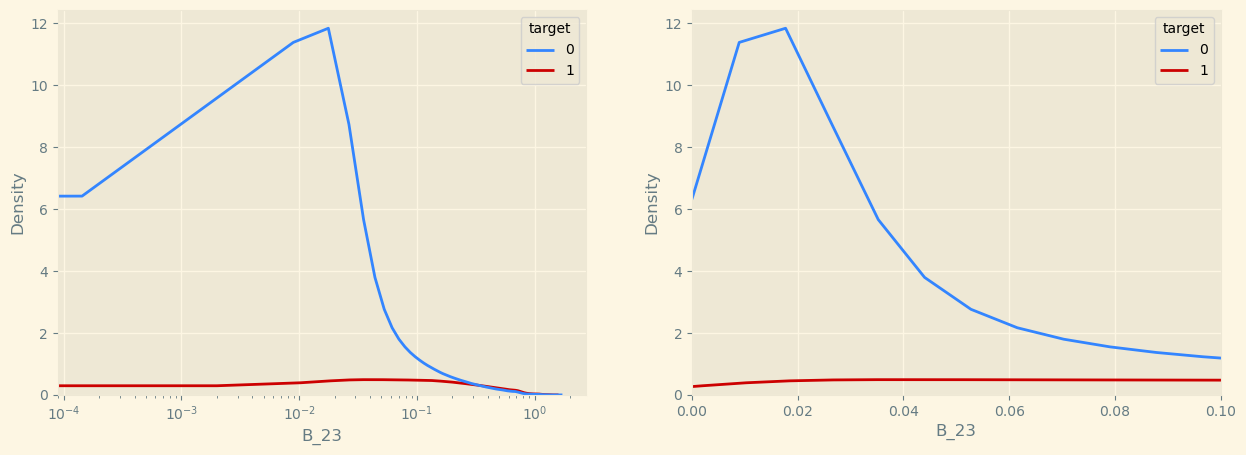

In [42]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=train_raw, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax[0])
ax[0].set_xscale('log')
sns.kdeplot(data=train_raw, x='B_23', hue='target', palette=["#3385ff", "#cc0000"], ax=ax[1])
ax[1].set_xlim([0,0.1])
plt.show()

In [43]:
finish = time.time()
total_time = finish - start

In [44]:
print(total_time)

690.727480173111
